In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# df1 = pd.read_csv("/content/drive/MyDrive/WBS, IKT KG Project/data/triplets/manually checked triples/csv/triplets_stefi.csv")
# df2 = pd.read_csv("/content/drive/MyDrive/WBS, IKT KG Project/data/triplets/manually checked triples/csv/triplets_dejan.csv")
# df3 = pd.read_csv("/content/drive/MyDrive/WBS, IKT KG Project/data/triplets/manually checked triples/csv/triplets_jana.csv")
# df = pd.concat([df1, df2, df3], ignore_index=True)

In [ ]:
# df.to_csv("/content/drive/MyDrive/WBS, IKT KG Project/data/triplets/manually checked triples/csv/merged_triplets.csv", index=False)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/WBS, IKT KG Project/data/triplets/manually checked triples/csv/merged_triplets.csv")

In [ ]:
df

,subject,predicate,object,in_snomed,exists_in_text
0,Patient 7237229-2,is,Female of child bearing age,1,1
1,Patient 7237229-2,is in,"Gestation period, 8 weeks",1,1
2,Patient 7237229-2,has,Vulva problem,1,1
3,Patient 7237229-2,has,Verruca vulgaris,1,1
4,Patient 7237229-2,has,Vagina finding,1,1
...,...,...,...,...,...
601,Patient 7947317-7,has,Collapse,1,1
602,Patient 7947317-8,is,"Age more than 50 years, female",1,1
603,Patient 7947317-8,has,Rash of systemic lupus erythematosus,1,0
604,Patient 7947317-8,has,Fever,1,1


In [ ]:
tp = df[(df['in_snomed'] == 1) & (df['exists_in_text'] == 1)].shape[0]
fp = df[(df['in_snomed'] == 1) & (df['exists_in_text'] == 0)].shape[0]
tn = df[(df['in_snomed'] == 0) & (df['exists_in_text'] == 0)].shape[0]
fn = df[(df['in_snomed'] == 0) & (df['exists_in_text'] == 1)].shape[0]

print(f"TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}")

TP: 461, FP: 59, TN: 3, FN: 83


In [ ]:
conf_matrix = pd.DataFrame(
    [[tp, fp],
     [fn, tn]],
    columns=['Relevant to Report', 'Not Relevant to Report'],
    index=['In SNOMED CT', 'Not in SNOMED CT']
)

In [ ]:
print(conf_matrix)

                  Relevant to Report  Not Relevant to Report
In SNOMED CT                     461                      59
Not in SNOMED CT                  83                       3


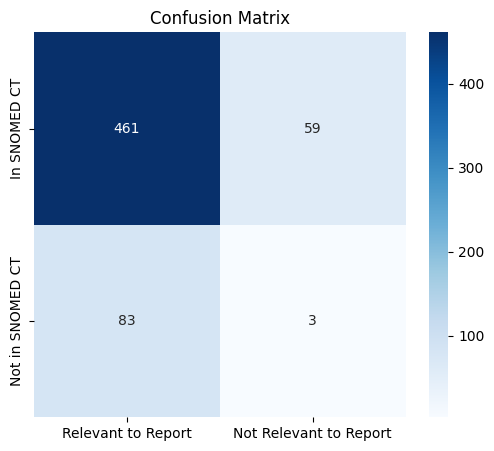

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.8865
Recall: 0.8474
F1 Score: 0.8665
